In [ ]:
import requests
import pandas as pd
import json

In [ ]:
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart'
params = {'vs_currency': 'usd', 'days': '90', 'interval': 'daily'}

In [ ]:
response = requests.get(url, params=params)

In [ ]:
response.text

'{"prices":[[1727049600000,63582.59956924825],[1727136000000,63327.02654450202],[1727222400000,64334.14274876097],[1727308800000,63151.89959401337],[1727395200000,65130.76884023231],[1727481600000,65791.00212541742],[1727568000000,65934.10709441357],[1727654400000,65663.68986662335],[1727740800000,63243.27532464382],[1727827200000,60872.668543725544],[1727913600000,60655.55979196848],[1728000000000,60727.86395169296],[1728086400000,62103.01047283253],[1728172800000,62091.932585194016],[1728259200000,62811.79972811266],[1728345600000,62287.39010510681],[1728432000000,62185.230423727575],[1728518400000,60597.15045618275],[1728604800000,60195.18073772453],[1728691200000,62392.34048293159],[1728777600000,63207.77062127557],[1728864000000,62829.533686088886],[1728950400000,66049.99492708022],[1729036800000,66962.21994496793],[1729123200000,67647.54414766871],[1729209600000,67328.10527002988],[1729296000000,68465.61920668735],[1729382400000,68388.87128965274],[1729468800000,68962.82918045693

In [ ]:
file = response.json()

In [ ]:
prices_df = pd.DataFrame(file["prices"], columns=["timestamp", "price"])
market_caps_df = pd.DataFrame(file["market_caps"], columns=["timestamp", "market_cap"])
volumes_df = pd.DataFrame(file["total_volumes"], columns=["timestamp", "total_volume"])

In [ ]:
for df in [prices_df, market_caps_df, volumes_df]:
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
    df.set_index("timestamp", inplace=True)

In [ ]:
data = prices_df.join(market_caps_df).join(volumes_df)

*total-volume - общий_объем

In [ ]:
data.sample(5)

,price,market_cap,total_volume
timestamp,,,
2024-10-09 00:00:00,62185.230424,1.229717e+12,2.862643e+10
2024-12-21 13:59:30,97362.464349,1.925037e+12,6.961036e+10
2024-10-07 00:00:00,62811.799728,1.241834e+12,1.459242e+10
2024-11-16 00:00:00,90947.975094,1.799276e+12,8.438249e+10
2024-12-15 00:00:00,101367.010646,2.007646e+12,5.732192e+10


In [ ]:
data.index.min(), data.index.max()

(Timestamp('2024-09-23 00:00:00'), Timestamp('2024-12-21 13:59:30'))

In [ ]:
pd_df = data.reset_index().copy()

In [ ]:
data = pd_df.copy()

In [ ]:
data.timestamp = data.timestamp.dt.date

In [ ]:
data

,timestamp,price,market_cap,total_volume
0,2024-09-23,63582.599569,1.255899e+12,2.034937e+10
1,2024-09-24,63327.026545,1.251095e+12,2.399885e+10
2,2024-09-25,64334.142749,1.271184e+12,3.149098e+10
3,2024-09-26,63151.899594,1.245721e+12,2.608764e+10
4,2024-09-27,65130.768840,1.287151e+12,3.799557e+10
...,...,...,...,...
86,2024-12-18,106034.913403,2.100630e+12,9.341783e+10
87,2024-12-19,100355.576148,1.985285e+12,1.136920e+11
88,2024-12-20,97851.353771,1.937022e+12,1.006116e+11
89,2024-12-21,97691.434317,1.932373e+12,1.123409e+11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     91 non-null     object 
 1   price         91 non-null     float64
 2   market_cap    91 non-null     float64
 3   total_volume  91 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.0+ KB


In [ ]:
data[['price','market_cap','total_volume']].corr()

,price,market_cap,total_volume
price,1.000000,0.999992,0.724032
market_cap,0.999992,1.000000,0.723543
total_volume,0.724032,0.723543,1.000000


In [ ]:
data = data.drop(columns=['market_cap'])

In [ ]:
data[['price','total_volume']].corr()

,price,total_volume
price,1.000000,0.724032
total_volume,0.724032,1.000000


In [ ]:
df_norm = pd.DataFrame()

In [ ]:
df_norm["timestamp"] = data.timestamp

In [ ]:
df_norm.head()

,price,timestamp
0,-1.070363,2024-09-23
1,-1.086758,2024-09-24
2,-1.022153,2024-09-25
3,-1.097993,2024-09-26
4,-0.971050,2024-09-27


In [ ]:
df_norm['price'] = (data.price - data.price.mean())/data.price.std()

In [ ]:
df_norm.head()

,price,timestamp
0,-1.070363,2024-09-23
1,-1.086758,2024-09-24
2,-1.022153,2024-09-25
3,-1.097993,2024-09-26
4,-0.971050,2024-09-27


In [ ]:
df_norm['total_volume'] = (data.total_volume - data.total_volume.mean())/data.total_volume.std()

In [ ]:
df_norm.head()

,price,timestamp,total_volume
0,-1.070363,2024-09-23,-1.076578
1,-1.086758,2024-09-24,-0.981062
2,-1.022153,2024-09-25,-0.784975
3,-1.097993,2024-09-26,-0.926393
4,-0.971050,2024-09-27,-0.614735


In [ ]:
df_norm['EMA'] = df_norm['price'].rolling(window=4).mean()

In [ ]:
df_norm

,price,timestamp,total_volume,EMA
0,-1.070363,2024-09-23,-1.076578,NaN
1,-1.086758,2024-09-24,-0.981062,NaN
2,-1.022153,2024-09-25,-0.784975,NaN
3,-1.097993,2024-09-26,-0.926393,-1.069317
4,-0.971050,2024-09-27,-0.614735,-1.044488
...,...,...,...,...
86,1.652919,2024-12-18,0.835796,1.557623
87,1.288594,2024-12-19,1.366420,1.541403
88,1.127950,2024-12-20,1.024073,1.431224
89,1.117691,2024-12-21,1.331056,1.296789


In [ ]:
df_norm['EMA'] = df_norm['EMA'].fillna(method='ffill').fillna(method='bfill')

<ipython-input-96-67cca1f00280>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_norm['EMA'] = df_norm['EMA'].fillna(method='ffill').fillna(method='bfill')


In [ ]:
df_norm

,price,timestamp,total_volume,EMA
0,-1.070363,2024-09-23,-1.076578,-1.069317
1,-1.086758,2024-09-24,-0.981062,-1.069317
2,-1.022153,2024-09-25,-0.784975,-1.069317
3,-1.097993,2024-09-26,-0.926393,-1.069317
4,-0.971050,2024-09-27,-0.614735,-1.044488
...,...,...,...,...
86,1.652919,2024-12-18,0.835796,1.557623
87,1.288594,2024-12-19,1.366420,1.541403
88,1.127950,2024-12-20,1.024073,1.431224
89,1.117691,2024-12-21,1.331056,1.296789


In [ ]:
df_norm['timestamp'] = pd.to_datetime(df_norm['timestamp'])

In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         91 non-null     float64       
 1   timestamp     91 non-null     datetime64[ns]
 2   total_volume  91 non-null     float64       
 3   EMA           91 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.0 KB


In [ ]:
import matplotlib.pyplot as plt

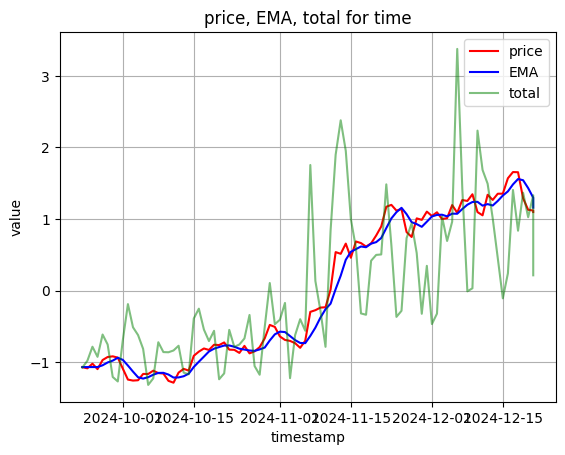

In [ ]:
plt.plot(df_norm['timestamp'], df_norm['price'], label='price', color='red')
plt.plot(df_norm['timestamp'], df_norm['EMA'], label='EMA', color='blue')
plt.plot(df_norm['timestamp'], df_norm['total_volume'], label='total', color='green', alpha=0.5)
plt.xlabel('timestamp')
plt.ylabel('value')
plt.title('price, EMA, total for time')
plt.legend()
plt.grid(True)